In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
warnings.filterwarnings('ignore')

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']


adult_df = pd.read_csv("data/adult_training.csv",
                      delimiter=",",
                      skipinitialspace=True,
                      names = column_names,
                      dtype=None)

adult_test_df = pd.read_csv("data/adult_training.csv",
                      delimiter=",",
                      skipinitialspace=True,
                      names = column_names,
                      dtype=None)

from sklearn.model_selection import train_test_split
from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import train_test_split
from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier

from joblib import dump, load
from sklearn.model_selection import cross_val_score
import sys

from pandas.tools.plotting import table
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import l1_min_c

In [3]:
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax



In [29]:
log_df = pd.read_csv('./logDataFrame.csv')
dtree_df = pd.read_csv('./dtreeDataFrame.csv')
svm_df = pd.read_csv('./svmDataFrame.csv')



In [52]:
log_df = pd.read_csv('./logDataFrame.csv')
dtree_df = pd.read_csv('./dtreeDataFrame.csv')
svm_df = pd.read_csv('./svmDataFrame.csv')
nn_df = pd.read_csv('./nn.csv')

ovl_df = pd.DataFrame()
log_df.rename(columns={"Log Reg" : "index"},inplace=True)


log_df = pd.DataFrame(log_df[0:1])
ovl_df = pd.concat([ovl_df,log_df],ignore_index=True)
ovl_df.replace('C = 6.8744','Log Reg',inplace=True)



temp_df = pd.DataFrame(dtree_df[4:5])
dtree_df = pd.DataFrame(dtree_df[0:3])
dtree_df = pd.concat([dtree_df, temp_df ])
dtree_df.replace('DTree_Gini 80', 'Random Forest Gini',inplace=True)
dtree_df.replace('DTree_Entropy 20', 'Random Forest Entropy',inplace=True)

svm_df = pd.DataFrame(svm_df[0:2])
svm_df.replace('SVM rbf 40', 'Ensemble SVM',inplace=True)

ovl_df = pd.concat([ovl_df, svm_df],ignore_index=True)

nn_df.rename(columns={"Unnamed: 0" : "index"},inplace=True)




ovl_df = pd.concat([ovl_df, dtree_df],ignore_index=True)
ovl_df = pd.concat([ovl_df, nn_df],ignore_index=True)


# display(ovl_df)
# display(nn_df)
display(ovl_df)

,index,accuracy,error_rate,f_measure,false_pos,precision,recall,sensitivity,specificity
0,Log Reg,0.851400,0.148600,0.661100,0.069400,0.733300,0.60180,0.60180,0.930600
1,Ensemble SVM,0.852300,0.147700,0.655500,0.062400,0.747800,0.58350,0.58350,0.937600
2,SVM rbf,0.853600,0.146400,0.654700,0.058500,0.757600,0.57650,0.57650,0.941500
3,DTree_Gini,0.856800,0.143200,0.656500,0.051700,0.777300,0.56830,0.56830,0.948300
4,DTree_Entropy,0.856100,0.143900,0.654900,0.052100,0.775300,0.56690,0.56690,0.947900
5,Random Forest Gini,0.856600,0.143400,0.651400,0.048100,0.785800,0.55630,0.55630,0.951900
6,Random Forest Entropy,0.856500,0.143500,0.650000,0.047300,0.787700,0.55320,0.55320,0.952700
7,Neural Network,0.868186,0.131814,0.712178,0.071238,0.750955,0.67721,0.67721,0.928762


In [53]:
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [55]:
ovl_df.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)
display(ovl_df.round(4))

,index,accuracy,error_rate,f_measure,false_pos,precision,recall,sensitivity,specificity
7,Neural Network,0.8682,0.1318,0.7122,0.0712,0.7510,0.6772,0.6772,0.9288
0,Log Reg,0.8514,0.1486,0.6611,0.0694,0.7333,0.6018,0.6018,0.9306
3,DTree_Gini,0.8568,0.1432,0.6565,0.0517,0.7773,0.5683,0.5683,0.9483
1,Ensemble SVM,0.8523,0.1477,0.6555,0.0624,0.7478,0.5835,0.5835,0.9376
4,DTree_Entropy,0.8561,0.1439,0.6549,0.0521,0.7753,0.5669,0.5669,0.9479
2,SVM rbf,0.8536,0.1464,0.6547,0.0585,0.7576,0.5765,0.5765,0.9415
5,Random Forest Gini,0.8566,0.1434,0.6514,0.0481,0.7858,0.5563,0.5563,0.9519
6,Random Forest Entropy,0.8565,0.1435,0.6500,0.0473,0.7877,0.5532,0.5532,0.9527


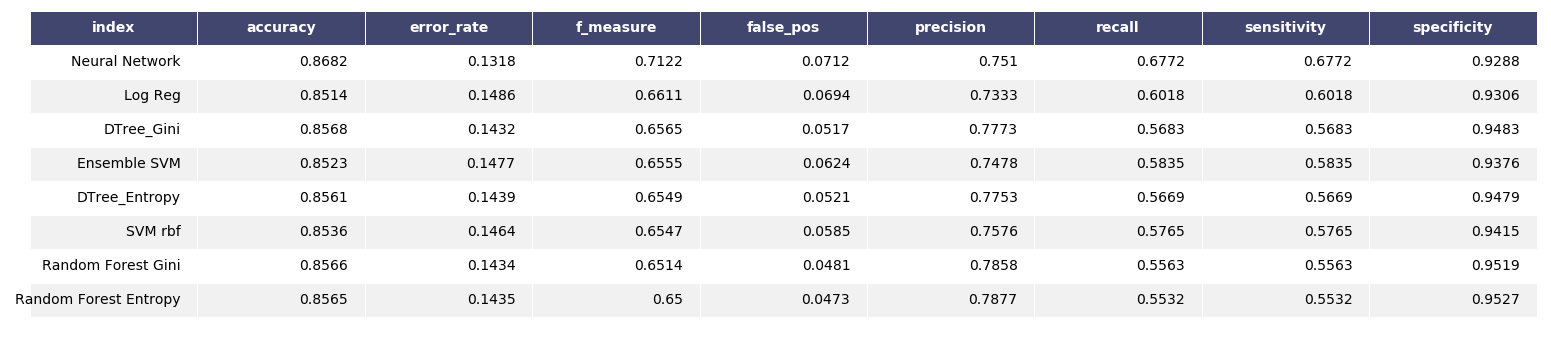

In [59]:
render_mpl_table(ovl_df.round(4), header_columns=0, col_width=3)
plt.savefig("ovl_table.png")